## **Import Library**

In [ ]:
!pip uninstall -y mlxtend
!pip install mlxtend --upgrade


Found existing installation: mlxtend 0.23.4
Uninstalling mlxtend-0.23.4:
  Successfully uninstalled mlxtend-0.23.4
  Using cached mlxtend-0.23.4-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)


In [ ]:
!pip install scikit-posthocs

In [ ]:
!pip install -q tensorflow
!pip install efficientnet
!pip install tensorflow_addons

In [ ]:
!pip install keras-metrics

In [ ]:
import tensorflow as tf

In [ ]:
from tqdm import tqdm_notebook
ram=[]
for i in tqdm_notebook(range(100)):
  ram.append("randomword"*i)

/tmp/ipython-input-21-2252751400.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(100)):


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import os
import time
import os, glob, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.python.keras.utils import get_custom_objects
import efficientnet.tfkeras as efn
from tqdm import tqdm
#import tensorflow_addons as tfa
import openpyxl

In [ ]:
SEED = 42
def seed_everything(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)

seed_everything(SEED)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install fonts-crosextra-carlito


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-crosextra-carlito is already the newest version (20130920-1.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


##**Graph across epochs**

In [ ]:
SEED = 42
EPOCHS = 50
BATCH_SIZE = 16
IMG_HEIGHT = 512
IMG_WIDTH = 512

In [ ]:
import keras_metrics as km

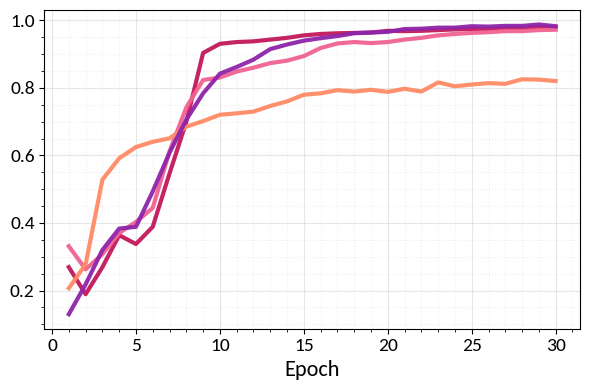

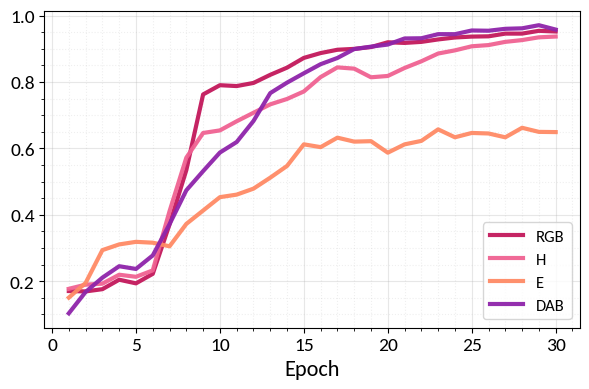

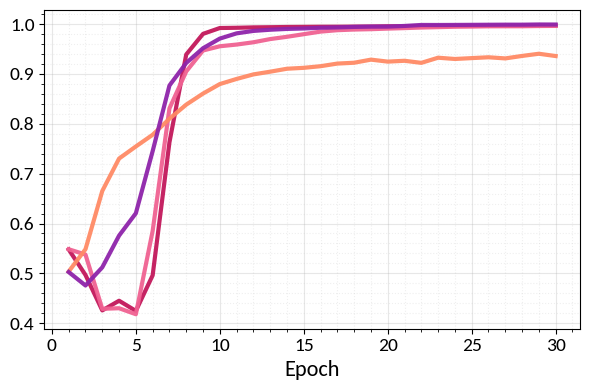

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# === ✅ Use your clean font ===
font_path = '/usr/share/fonts/truetype/crosextra/Carlito-Regular.ttf'
fm.fontManager.addfont(font_path)
mpl.rcParams['font.family'] = 'Carlito'

# === ✅ Model suffixes ===
models = ['null', '_H', '_E', '_DAB']
metrics = ['accuracy', 'f1', 'roc_auc']

# === ✅ Better balanced warm-pink palette
model_colors = {
    'null': '#C2185B',   # Deep Rose (RGB)
    '_H':   '#F06292',   # Coral Red (H)
    '_E':   '#FF8A65',   # Warm Peach (E)
    '_DAB': '#8E24AA'    # Mulberry Rose (DAB)
}

# === ✅ Loop over each metric and plot separately
for metric in metrics:
    plt.figure(figsize=(6, 4))
    ax = plt.gca()

    for model in models:
        dfs = []
        for fold in range(1, 5):
            if model == 'null':
                file_path = f'/content/drive/My Drive/pap_smear/metrics/metrics_fold{fold}.csv'
            else:
                file_path = f'/content/drive/My Drive/pap_smear/metrics/metrics_fold{fold}{model}.csv'

            df = pd.read_csv(file_path)
            df['fold'] = fold
            dfs.append(df)

        model_df = pd.concat(dfs, ignore_index=True)
        metric_df = model_df[(model_df['metric'] == metric) & (model_df['class'] == 'overall')]
        mean_df = metric_df.groupby('epoch')['value'].mean().reset_index()

        label = 'RGB' if model == 'null' else model.replace('_', '')

        ax.plot(
            mean_df['epoch'],
            mean_df['value'],
            '-',
            label=label,
            color=model_colors[model],
            linewidth=3,
            alpha=0.95
        )

    ax.set_xlabel('Epoch', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.grid(which='major', linestyle='-', alpha=0.3)
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', alpha=0.2)

    # ✅ Only show legend for F1
    if metric == 'f1':
        ax.legend(fontsize=12, loc='lower right')

    plt.tight_layout()
    plt.show()


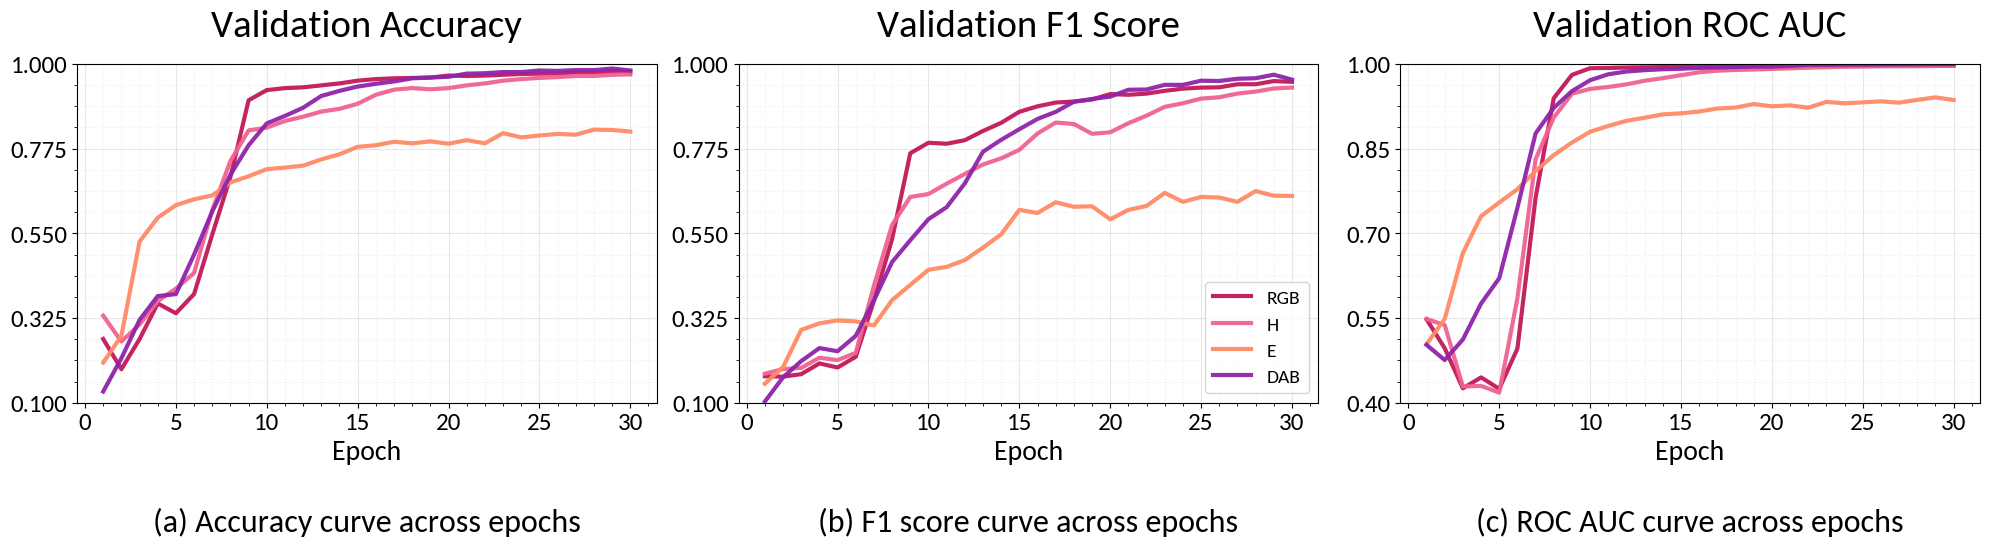

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import numpy as np

# === ✅ Use your clean font ===
font_path = '/usr/share/fonts/truetype/crosextra/Carlito-Regular.ttf'
fm.fontManager.addfont(font_path)
mpl.rcParams['font.family'] = 'Carlito'



# === ✅ Model suffixes ===
models = ['null', '_H', '_E', '_DAB']
metrics = ['accuracy', 'f1', 'roc_auc']
pretty_titles = {
    'accuracy': 'Validation Accuracy',
    'f1': 'Validation F1 Score',
    'roc_auc': 'Validation ROC AUC'
}
panel_labels = {
    'accuracy': '(a) Accuracy curve across epochs',
    'f1': '(b) F1 score curve across epochs',
    'roc_auc': '(c) ROC AUC curve across epochs'
}

# === ✅ Better balanced warm-pink palette
model_colors = {
    'null': '#C2185B',
    '_H':   '#F06292',
    '_E':   '#FF8A65',
    '_DAB': '#8E24AA'
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

desired_tick_labels = 5

for idx, metric in enumerate(metrics):
    ax = axes[idx]

    all_values = []

    for model in models:
        dfs = []
        for fold in range(1, 5):
            if model == 'null':
                file_path = f'/content/drive/My Drive/pap_smear/metrics/metrics_fold{fold}.csv'
            else:
                file_path = f'/content/drive/My Drive/pap_smear/metrics/metrics_fold{fold}{model}.csv'

            df = pd.read_csv(file_path)
            df['fold'] = fold
            dfs.append(df)

        model_df = pd.concat(dfs, ignore_index=True)

        metric_df = model_df[(model_df['metric'] == metric) & (model_df['class'] == 'overall')]
        mean_df = metric_df.groupby('epoch')['value'].mean().reset_index()

        all_values.extend(mean_df['value'].tolist())

        label = 'RGB' if model == 'null' else model.replace('_', '')

        ax.plot(
            mean_df['epoch'],
            mean_df['value'],
            '-',
            label=label,
            color=model_colors[model],
            linewidth=3,
            alpha=0.95
        )

    # === ✅ Compute rounded limits and ticks
    y_min = np.floor(min(all_values) * 10) / 10
    y_max = np.ceil(max(all_values) * 10) / 10
    ax.set_ylim(y_min, y_max)
    y_ticks = np.linspace(y_min, y_max, desired_tick_labels)
    ax.set_yticks(y_ticks)

    # === ✅ Main title
    ax.set_title(pretty_titles[metric], fontsize=28, weight='bold', pad=20)

    # === ✅ Panel label below the title
    ax.text(
        0.5, -0.35,
        panel_labels[metric],
        fontsize=23,
        ha='center',
        va='center',
        transform=ax.transAxes
    )

    ax.set_xlabel('Epoch', fontsize=20)
    ax.tick_params(axis='both', labelsize=18)

    ax.grid(which='major', linestyle='-', alpha=0.3)
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', alpha=0.2)

    if metric == 'f1':
        ax.legend(fontsize=14, loc='lower right')

plt.tight_layout()
plt.show()


##**Performance Table**

      Model-Class       F1 ± std  Roc_auc ± std   Recall ± std Precision ± std
0   RGB - overall  0.952 ± 0.048  0.997 ± 0.003  0.951 ± 0.046   0.954 ± 0.050
1      RGB - NILM  0.999 ± 0.001  1.000 ± 0.000  1.000 ± 0.000   0.998 ± 0.003
2      RGB - LSIL  0.992 ± 0.014  1.000 ± 0.000  1.000 ± 0.000   0.984 ± 0.028
3      RGB - HSIL  0.943 ± 0.053  0.997 ± 0.003  0.938 ± 0.067   0.949 ± 0.042
4       RGB - SCC  0.875 ± 0.127  0.991 ± 0.011  0.868 ± 0.120   0.884 ± 0.137
5     H - overall  0.937 ± 0.038  0.996 ± 0.002  0.938 ± 0.035   0.942 ± 0.038
6        H - NILM  0.998 ± 0.003  1.000 ± 0.001  0.998 ± 0.003   0.997 ± 0.003
7        H - LSIL  0.987 ± 0.014  1.000 ± 0.000  1.000 ± 0.000   0.975 ± 0.028
8        H - HSIL  0.927 ± 0.051  0.996 ± 0.003  0.913 ± 0.082   0.946 ± 0.051
9         H - SCC  0.837 ± 0.103  0.990 ± 0.007  0.839 ± 0.119   0.850 ± 0.132
10    E - overall  0.649 ± 0.040  0.936 ± 0.022  0.628 ± 0.039   0.760 ± 0.081
11       E - NILM  0.922 ± 0.014  0.968 ± 0.010  0.9

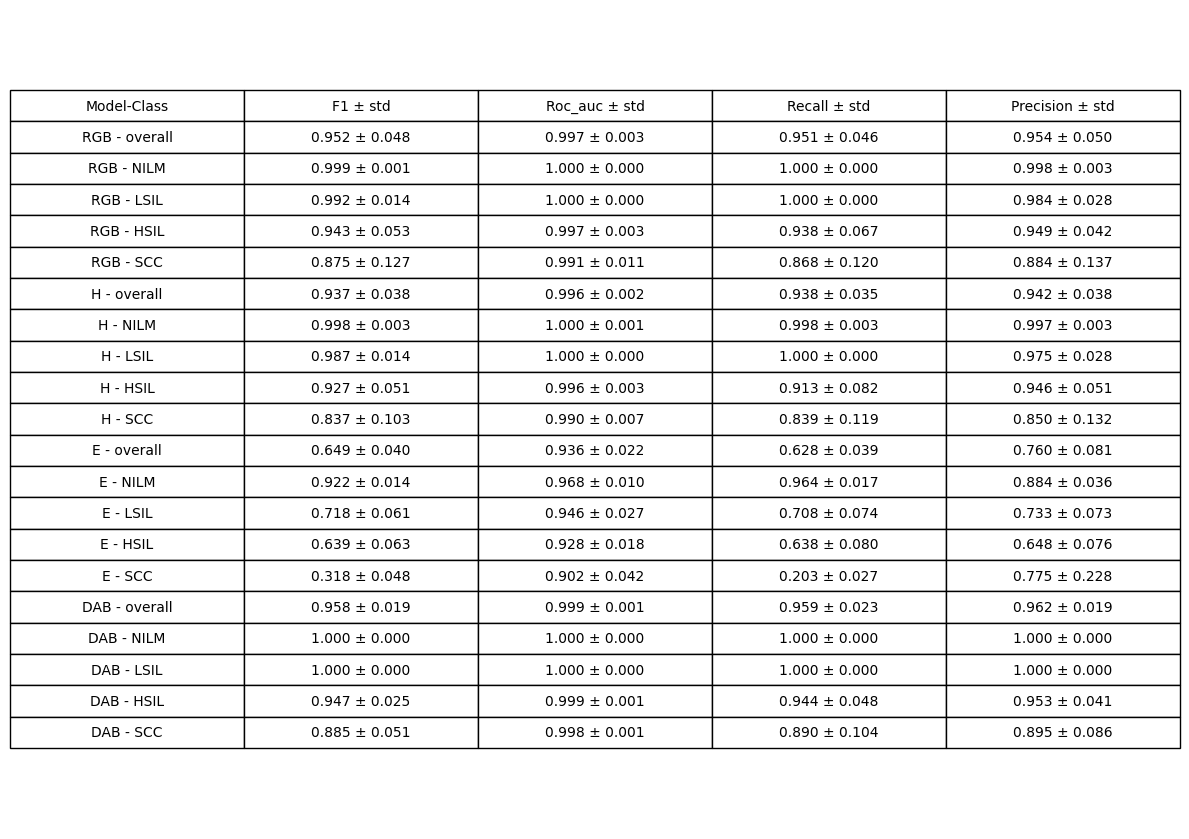

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# ✅ Set Calibri or fallback
font_path = '/usr/share/fonts/truetype/crosextra/Carlito-Regular.ttf'
fm.fontManager.addfont(font_path)
mpl.rcParams['font.family'] = 'Carlito'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# === ✅ Calibri fallback ===
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Calibri', 'DejaVu Sans']

# === ✅ Models ===
models = {
    'RGB': '',  # No suffix
    'H': '_H',
    'E': '_E',
    'DAB': '_DAB'
}

# === ✅ Classes ===
classes = ['overall', 'NILM', 'LSIL', 'HSIL', 'SCC']
metrics = [ 'f1', 'roc_auc', 'recall', 'precision']

# === ✅ Collect rows
summary_rows = []

for model_name, suffix in models.items():
    # Load all folds
    dfs = []
    for fold in range(1, 5):
        if suffix == '':
            path = f'/content/drive/My Drive/pap_smear/metrics/metrics_fold{fold}.csv'
        else:
            path = f'/content/drive/My Drive/pap_smear/metrics/metrics_fold{fold}{suffix}.csv'
        df = pd.read_csv(path)
        df['fold'] = fold
        dfs.append(df)

    model_df = pd.concat(dfs, ignore_index=True)

    # === ✅ Loop classes
    for cls in classes:
        row = {'Model-Class': f'{model_name} - {cls}'}
        for metric in metrics:
            vals = []
            for fold in range(1, 5):
                fold_df = model_df[model_df['fold'] == fold]
                final_epoch = fold_df['epoch'].max()
                final_df = fold_df[
                    (fold_df['epoch'] == final_epoch) &
                    (fold_df['metric'] == metric) &
                    (fold_df['class'] == cls)
                ]
                vals.extend(final_df['value'].tolist())
            mean = np.mean(vals)
            std = np.std(vals)
            row[f'{metric.capitalize()} ± std'] = f"{mean:.3f} ± {std:.3f}"
        summary_rows.append(row)

# === ✅ Final DataFrame
summary_df = pd.DataFrame(summary_rows)
print(summary_df)

# === ✅ Optional: save
summary_df.to_csv('/content/drive/My Drive/pap_smear/final_model_class_metrics.csv', index=False)

# === ✅ Plot table as figure
fig, ax = plt.subplots(figsize=(12, 0.5 + len(summary_df)*0.4))
ax.axis('off')
tbl = ax.table(
    cellText=summary_df.values,
    colLabels=summary_df.columns,
    cellLoc='center',
    loc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)

plt.tight_layout()
plt.savefig('/content/drive/My Drive/pap_smear/final_model_class_metrics.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd

# ✅ If you already have your final DataFrame:
# final_df = your finished DataFrame with **bold** strings

# === ✅ Save a LaTeX version ===
latex_str = final_df.to_latex(
    index=False,
    escape=False,  # <-- This keeps your **bold** intact for LaTeX
    column_format='l' + 'c' * (len(final_df.columns)-1)
)

print(latex_str)

# === ✅ Optional: save to .tex file
with open('/content/drive/My Drive/pap_smear/final_metrics_table.tex', 'w') as f:
    f.write(latex_str)


\begin{tabular}{lcccccccccccccccc}
\toprule
Class & F1 ± std (RGB) & F1 ± std (H) & F1 ± std (E) & F1 ± std (DAB) & Roc_auc ± std (RGB) & Roc_auc ± std (H) & Roc_auc ± std (E) & Roc_auc ± std (DAB) & Recall ± std (RGB) & Recall ± std (H) & Recall ± std (E) & Recall ± std (DAB) & Precision ± std (RGB) & Precision ± std (H) & Precision ± std (E) & Precision ± std (DAB) \\
\midrule
overall & 0.952 ± 0.056 & 0.937 ± 0.043 & 0.649 ± 0.046 & **0.958 ± 0.022** & 0.997 ± 0.004 & 0.996 ± 0.002 & 0.936 ± 0.025 & **0.999 ± 0.001** & 0.951 ± 0.053 & 0.938 ± 0.040 & 0.628 ± 0.045 & **0.959 ± 0.026** & 0.954 ± 0.058 & 0.942 ± 0.044 & 0.760 ± 0.093 & **0.962 ± 0.022** \\
NILM & 0.999 ± 0.002 & 0.998 ± 0.003 & 0.922 ± 0.016 & **1.000 ± 0.000** & **1.000 ± 0.000** & 1.000 ± 0.001 & 0.968 ± 0.012 & 1.000 ± 0.000 & **1.000 ± 0.000** & 0.998 ± 0.003 & 0.964 ± 0.020 & 1.000 ± 0.000 & 0.998 ± 0.003 & 0.997 ± 0.004 & 0.884 ± 0.042 & **1.000 ± 0.000** \\
LSIL & 0.992 ± 0.017 & 0.987 ± 0.016 & 0.718 ± 0.071 & 

  Method                   f1             accuracy              roc_auc  \
0    RGB      0.9522 ± 0.0481      0.9792 ± 0.0201      0.9972 ± 0.0033   
1      H      0.9370 ± 0.0377      0.9720 ± 0.0156      0.9964 ± 0.0021   
2      E      0.6492 ± 0.0398      0.8202 ± 0.0237      0.9360 ± 0.0216   
3    DAB  **0.9580 ± 0.0187**  **0.9823 ± 0.0080**  **0.9992 ± 0.0005**   

                recall            precision  
0      0.9514 ± 0.0457      0.9539 ± 0.0502  
1      0.9377 ± 0.0346      0.9420 ± 0.0382  
2      0.6283 ± 0.0388      0.7600 ± 0.0805  
3  **0.9587 ± 0.0226**  **0.9621 ± 0.0194**  


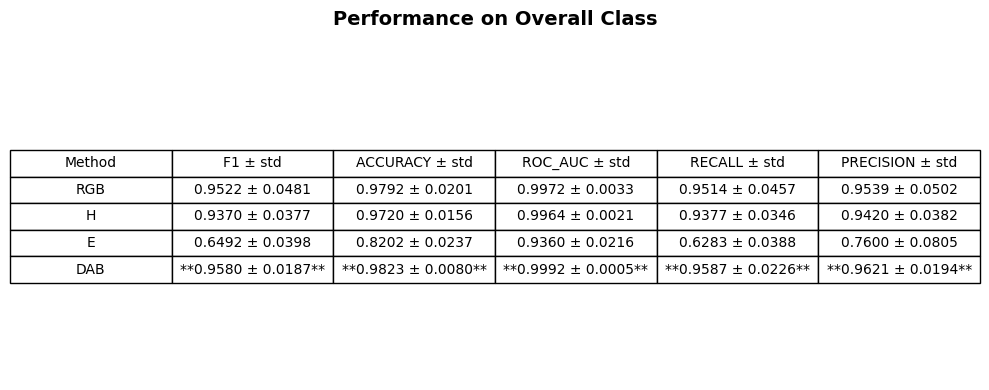

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# === ✅ Use Calibri if available ===
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Calibri', 'DejaVu Sans']

# === ✅ Models ===
models = {
    'RGB': '',  # No suffix
    'H': '_H',
    'E': '_E',
    'DAB': '_DAB'
}

metrics = ['f1', 'accuracy', 'roc_auc', 'recall', 'precision']

# === ✅ Compute mean ± std for overall only ===
summary_rows = []

for model_name, suffix in models.items():
    dfs = []
    for fold in range(1, 5):
        if suffix == '':
            path = f'/content/drive/My Drive/pap_smear/metrics/metrics_fold{fold}.csv'
        else:
            path = f'/content/drive/My Drive/pap_smear/metrics/metrics_fold{fold}{suffix}.csv'
        df = pd.read_csv(path)
        df['fold'] = fold
        dfs.append(df)
    model_df = pd.concat(dfs, ignore_index=True)

    row = {'Method': model_name}
    for metric in metrics:
        vals = []
        for fold in range(1, 5):
            fold_df = model_df[model_df['fold'] == fold]
            final_epoch = fold_df['epoch'].max()
            final_df = fold_df[
                (fold_df['epoch'] == final_epoch) &
                (fold_df['metric'] == metric) &
                (fold_df['class'] == 'overall')
            ]
            vals.extend(final_df['value'].tolist())
        mean = np.mean(vals)
        std = np.std(vals)
        row[f'{metric}'] = (mean, std)
    summary_rows.append(row)

# === ✅ Build DataFrame with bold bests ===
table_rows = []
best_per_metric = {}

for metric in metrics:
    best_mean = max(row[metric][0] for row in summary_rows)
    best_per_metric[metric] = best_mean

for row in summary_rows:
    table_row = {'Method': row['Method']}
    for metric in metrics:
        mean, std = row[metric]
        formatted = f"{mean:.4f} ± {std:.4f}"
        if mean == best_per_metric[metric]:
            formatted = f"**{formatted}**"
        table_row[metric] = formatted
    table_rows.append(table_row)

final_df = pd.DataFrame(table_rows)

# === ✅ Display final DataFrame
print(final_df)

# === ✅ Plot nicely as PNG
fig, ax = plt.subplots(figsize=(10, 2 + len(final_df) * 0.5))
ax.axis('off')

# Pretty column headers
col_labels = ['Method'] + [f"{m.upper()} ± std" for m in metrics]

tbl = ax.table(
    cellText=final_df.values,
    colLabels=col_labels,
    cellLoc='center',
    loc='center'
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)

ax.set_title("Performance on Overall Class", fontsize=14, weight='bold', pad=20)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# === Example setup ===
models = {
    'RGB': '',
    'H': '_H',
    'E': '_E',
    'DAB': '_DAB'
}

confusion_keys = ['TN', 'FP', 'FN', 'TP']
summary_rows = []

for model_name, suffix in models.items():
    vals_dict = {k: [] for k in confusion_keys}

    for fold in range(1, 5):
        if suffix == '':
            path = f'/content/drive/My Drive/pap_smear/preds/fold{fold}_preds_RGB.csv'
        else:
            path = f'/content/drive/My Drive/pap_smear/preds/fold{fold}_preds{suffix}.csv'

        df = pd.read_csv(path)

        # === Compute confusion matrix manually ===
        y_true = df['true_label']
        y_pred = df['pred_label']

        TP = np.sum((y_true == 1) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))

        vals_dict['TN'].append(TN)
        vals_dict['FP'].append(FP)
        vals_dict['FN'].append(FN)
        vals_dict['TP'].append(TP)

    row = {'Method': model_name}
    for k in confusion_keys:
        total = np.sum(vals_dict[k])
        row[k] = total
    summary_rows.append(row)

# === ✅ Build final table with bold highlights ===
table_rows = []
best = {
    'TN': max(r['TN'] for r in summary_rows),
    'TP': max(r['TP'] for r in summary_rows),
    'FP': min(r['FP'] for r in summary_rows),
    'FN': min(r['FN'] for r in summary_rows)
}

for row in summary_rows:
    out_row = {'Method': row['Method']}
    for k in confusion_keys:
        val = row[k]
        val_fmt = f"{val:,}"
        if (k in ['TN', 'TP'] and val == best[k]) or (k in ['FP', 'FN'] and val == best[k]):
            val_fmt = f"**{val_fmt}**"
        out_row[k] = val_fmt
    table_rows.append(out_row)

final_df = pd.DataFrame(table_rows)
print(final_df)


  Method       TN     FP     FN       TP
0    RGB  **612**  **0**  **0**  **113**
1      H      611  **0**  **0**  **113**
2      E      593      2     29       77
3    DAB  **612**  **0**  **0**  **113**


In [ ]:
import pandas as pd
import numpy as np

# === Model setup ===
models = {
    'RGB': '',
    'H': '_H',
    'E': '_E',
    'DAB': '_DAB'
}

classes = [0, 1, 2, 3]  # adjust if your classes are named differently: NILM, LSIL, HSIL, SCC
class_names = ['NILM', 'LSIL', 'HSIL', 'SCC']

summary_rows = []

for model_name, suffix in models.items():
    # One row per class
    for class_id, class_name in zip(classes, class_names):
        # Store totals across folds
        totals = {'TN': 0, 'FP': 0, 'FN': 0, 'TP': 0}

        for fold in range(1, 5):
            if suffix == '':
                path = f'/content/drive/My Drive/pap_smear/preds/fold{fold}_preds_RGB.csv'
            else:
                path = f'/content/drive/My Drive/pap_smear/preds/fold{fold}_preds{suffix}.csv'

            df = pd.read_csv(path)

            y_true = df['true_label']
            y_pred = df['pred_label']

            TP = np.sum((y_true == class_id) & (y_pred == class_id))
            FP = np.sum((y_true != class_id) & (y_pred == class_id))
            FN = np.sum((y_true == class_id) & (y_pred != class_id))
            TN = np.sum((y_true != class_id) & (y_pred != class_id))

            totals['TP'] += TP
            totals['FP'] += FP
            totals['FN'] += FN
            totals['TN'] += TN

        # Save row for this model-class pair
        summary_rows.append({
            'Method': model_name,
            'Class': class_name,
            'TN': totals['TN'],
            'FP': totals['FP'],
            'FN': totals['FN'],
            'TP': totals['TP']
        })

# === ✅ Build final table with bold highlights ===
# For each metric, we can highlight the best per class!
rows = []
for class_name in class_names:
    class_rows = [r for r in summary_rows if r['Class'] == class_name]

    best_TN = max(r['TN'] for r in class_rows)
    best_TP = max(r['TP'] for r in class_rows)
    best_FP = min(r['FP'] for r in class_rows)
    best_FN = min(r['FN'] for r in class_rows)

    for row in class_rows:
        out_row = {
            'Method': row['Method'],
            'Class': row['Class']
        }
        for k in ['TN', 'FP', 'FN', 'TP']:
            val = row[k]
            if (k in ['TN', 'TP'] and val == locals()[f'best_{k}']) or \
               (k in ['FP', 'FN'] and val == locals()[f'best_{k}']):
                val_fmt = f"**{val:,}**"
            else:
                val_fmt = f"{val:,}"
            out_row[k] = val_fmt
        rows.append(out_row)

final_df = pd.DataFrame(rows)
print(final_df)


   Method Class       TN     FP     FN       TP
0     RGB  NILM  **349**  **1**  **0**  **612**
1       H  NILM      348      2      1      611
2       E  NILM      269     81     19      593
3     DAB  NILM  **349**  **1**  **0**  **612**
4     RGB  LSIL      847      2  **0**  **113**
5       H  LSIL      846      3  **0**  **113**
6       E  LSIL      820     29     36       77
7     DAB  LSIL  **849**  **0**  **0**  **113**
8     RGB  HSIL      791      8     10      153
9       H  HSIL      790      9     14      149
10      E  HSIL      747     52     51      112
11    DAB  HSIL  **792**  **7**  **6**  **157**
12    RGB   SCC      879      9     10       64
13      H   SCC      875     13     12       62
14      E   SCC  **885**  **3**     59       15
15    DAB   SCC      883      5  **7**   **67**


In [ ]:
import pandas as pd
import numpy as np

# === Model setup ===
models = {
    'RGB': '',
    'H': '_H',
    'E': '_E',
    'DAB': '_DAB'
}

classes = [0, 1, 2, 3]  # class IDs
class_names = ['NILM', 'LSIL', 'HSIL', 'SCC']

summary_rows = []

for model_name, suffix in models.items():
    for class_id, class_name in zip(classes, class_names):
        totals = {'TN': 0, 'FP': 0, 'FN': 0, 'TP': 0}

        for fold in range(1, 5):
            if suffix == '':
                path = f'/content/drive/My Drive/pap_smear/preds/fold{fold}_preds_RGB.csv'
            else:
                path = f'/content/drive/My Drive/pap_smear/preds/fold{fold}_preds{suffix}.csv'

            df = pd.read_csv(path)
            y_true = df['true_label']
            y_pred = df['pred_label']

            TP = np.sum((y_true == class_id) & (y_pred == class_id))
            FP = np.sum((y_true != class_id) & (y_pred == class_id))
            FN = np.sum((y_true == class_id) & (y_pred != class_id))
            TN = np.sum((y_true != class_id) & (y_pred != class_id))

            totals['TP'] += TP
            totals['FP'] += FP
            totals['FN'] += FN
            totals['TN'] += TN

        # Compute metrics safely
        precision = totals['TP'] / (totals['TP'] + totals['FP']) if (totals['TP'] + totals['FP']) > 0 else 0
        recall = totals['TP'] / (totals['TP'] + totals['FN']) if (totals['TP'] + totals['FN']) > 0 else 0
        specificity = totals['TN'] / (totals['TN'] + totals['FP']) if (totals['TN'] + totals['FP']) > 0 else 0

        summary_rows.append({
            'Method': model_name,
            'Class': class_name,
            'Precision': precision,
            'Recall': recall,
            'Specificity': specificity
        })

# === ✅ Highlight best values per metric for each class ===
rows = []
for class_name in class_names:
    class_rows = [r for r in summary_rows if r['Class'] == class_name]

    best_precision = max(r['Precision'] for r in class_rows)
    best_recall = max(r['Recall'] for r in class_rows)
    best_specificity = max(r['Specificity'] for r in class_rows)

    for row in class_rows:
        out_row = {'Method': row['Method'], 'Class': row['Class']}
        for metric, best in zip(['Precision', 'Recall', 'Specificity'],
                                [best_precision, best_recall, best_specificity]):
            val = row[metric]
            val_fmt = f"{val:.3f}"
            if val == best:
                val_fmt = f"**{val_fmt}**"
            out_row[metric] = val_fmt
        rows.append(out_row)

final_df = pd.DataFrame(rows)
print(final_df)


   Method Class  Precision     Recall Specificity
0     RGB  NILM  **0.998**  **1.000**   **0.997**
1       H  NILM      0.997      0.998       0.994
2       E  NILM      0.880      0.969       0.769
3     DAB  NILM  **0.998**  **1.000**   **0.997**
4     RGB  LSIL      0.983  **1.000**       0.998
5       H  LSIL      0.974  **1.000**       0.996
6       E  LSIL      0.726      0.681       0.966
7     DAB  LSIL  **1.000**  **1.000**   **1.000**
8     RGB  HSIL      0.950      0.939       0.990
9       H  HSIL      0.943      0.914       0.989
10      E  HSIL      0.683      0.687       0.935
11    DAB  HSIL  **0.957**  **0.963**   **0.991**
12    RGB   SCC      0.877      0.865       0.990
13      H   SCC      0.827      0.838       0.985
14      E   SCC      0.833      0.203   **0.997**
15    DAB   SCC  **0.931**  **0.905**       0.994


##**statistical test (model comparison)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

# === ✅ Models and paths ===
models = {
    'RGB': '',  # No suffix
    'H': '_H',
    'E': '_E',
    'DAB': '_DAB'
}

target_class = 'overall'
metric = 'f1'

# === ✅ Gather per-fold scores
fold_rows = []

for fold in range(1, 5):
    fold_row = {'Fold': fold}
    for model_name, suffix in models.items():
        if suffix == '':
            path = f'/content/drive/My Drive/pap_smear/metrics/metrics_fold{fold}.csv'
        else:
            path = f'/content/drive/My Drive/pap_smear/metrics/metrics_fold{fold}{suffix}.csv'

        df = pd.read_csv(path)
        final_epoch = df['epoch'].max()

        final_val = df[
            (df['epoch'] == final_epoch) &
            (df['metric'] == metric) &
            (df['class'] == target_class)
        ]['value'].mean()

        fold_row[model_name] = final_val

    fold_rows.append(fold_row)

df_folds = pd.DataFrame(fold_rows)
print("\nPer-fold scores:")
print(df_folds)

# === ✅ Friedman test
stat, p = friedmanchisquare(*[df_folds[model] for model in models.keys()])
print(f"\nFriedman chi-square stat: {stat:.4f}")
print(f"Friedman p-value: {p:.4f}")

# === ✅ Conover's post hoc with Holm correction
if p < 0.05:
    print("\nFriedman test significant! Running Conover's post hoc with Holm correction...")

    # Melt to long format for scikit-posthocs
    df_long = df_folds.melt(
        id_vars=['Fold'],
        value_vars=models.keys(),
        var_name='Model',
        value_name='Score'
    )
    print("\nLong format for Conover's test:")
    print(df_long)

    conover = sp.posthoc_conover(
        df_long,
        val_col='Score',
        group_col='Model',
        p_adjust='holm'
    )
    print("\nConover post hoc p-values (Holm correction):")
    print(conover)
else:
    print("\nFriedman test not significant — no need for post hoc.")



Per-fold scores:
   Fold       RGB         H         E       DAB
0     1  0.872619  0.899929  0.624254  0.934590
1     2  0.960317  0.909244  0.607357  0.972214
2     3  1.000000  0.996099  0.712009  0.980014
3     4  0.976038  0.942830  0.653361  0.945310

Friedman chi-square stat: 8.1000
Friedman p-value: 0.0440

Friedman test significant! Running Conover's post hoc with Holm correction...

Long format for Conover's test:
    Fold Model     Score
0      1   RGB  0.872619
1      2   RGB  0.960317
2      3   RGB  1.000000
3      4   RGB  0.976038
4      1     H  0.899929
5      2     H  0.909244
6      3     H  0.996099
7      4     H  0.942830
8      1     E  0.624254
9      2     E  0.607357
10     3     E  0.712009
11     4     E  0.653361
12     1   DAB  0.934590
13     2   DAB  0.972214
14     3   DAB  0.980014
15     4   DAB  0.945310

Conover post hoc p-values (Holm correction):
          DAB         E         H       RGB
DAB  1.000000  0.020416  1.000000  1.000000
E    0.02041

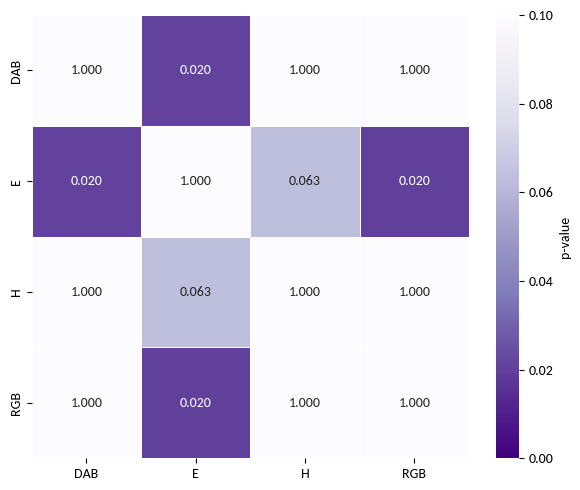

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# === ✅ Add your Carlito (Calibri fallback)
font_path = '/usr/share/fonts/truetype/crosextra/Carlito-Regular.ttf'
fm.fontManager.addfont(font_path)
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Carlito', 'Calibri', 'DejaVu Sans']

# === ✅ Plot Conover matrix with better colormap
plt.figure(figsize=(6, 5))
sns.heatmap(
    conover,
    annot=True,
    fmt=".3f",
    cmap="Purples_r",   # Or 'rocket_r', 'RdPu', or your custom map
    cbar_kws={'label': 'p-value'},
    linewidths=0.5,
    vmin=0,
    vmax=0.1            # Focus on significant range!
)

plt.tight_layout()
plt.show()
